In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the random walk result generated by the java program
random_walk_df = pd.read_csv("random_walk.csv")
steps = random_walk_df.iloc[:, 0:1].values
distances = random_walk_df.iloc[:, 1].values
random_walk_df

,n,d
0,1,0.839746
1,11,3.001391
2,21,4.186853
3,31,4.901891
4,41,5.628070
...,...,...
595,5951,68.016790
596,5961,69.192001
597,5971,67.597953
598,5981,60.766294


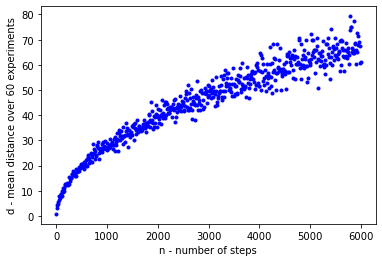

In [3]:
plt.plot(steps, distances, "b.",label='result set')
plt.xlabel('n - number of steps')
plt.ylabel('d - mean distance over 60 experiments')
plt.show()

In [4]:
# this looks like some polynomial expression (probably parabolic), hence I will try polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
# polynomial features applied to linear regression to get polynomial regression
poly = PolynomialFeatures(degree = 2, include_bias = True)
steps_trans = poly.fit_transform(steps)
lr = LinearRegression()
lr.fit(steps_trans, distances)

LinearRegression()

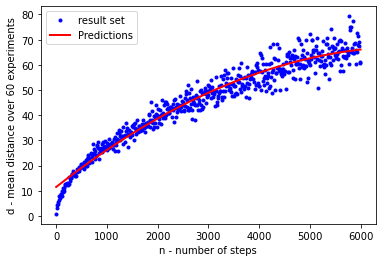

In [6]:
# Plotting the predection together with the random walk data
steps_new = np.linspace(0, 6000, 500).reshape(500, 1)
steps_new_poly = poly.transform(steps_new)
distances_new = lr.predict(steps_new_poly)
plt.plot(steps, distances, "b.",label='result set')
plt.plot(steps_new, distances_new, "r-", linewidth=2, label="Predictions")
plt.xlabel('n - number of steps')
plt.ylabel('d - mean distance over 60 experiments')
plt.legend()
plt.show()
# This prediction seems to fit the random walk data,
# hence the predected relation between d and n is d = a * sqrt(n), where a is a constant